<a href="https://colab.research.google.com/github/tbahng/Share/blob/master/Hands_On_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game-day Simulator for Baseball
* IST 718 - Hands-On Week 6

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# define simulator function to estimate and return a probability of home team win
# try with different distributions, default negative binomial distribution; alternative is poisson
def simulator(home_mean, away_mean, niterations, nbinom = True):
    random.seed(1234)
    # initialize n-iterations of home and away game scores
    home_game_score = [0] * niterations
    away_game_score = [0] * niterations
    home_win = [0] * niterations # either 0 (home team loss) or 1 (home team win)
    i = 0
    while (i < niterations):    
      if nbinom:
        home_game_score[i] = np.random.poisson(home_mean, size = 1)[0]
        away_game_score[i] = np.random.poisson(away_mean, size = 1)[0]
      else:
        home_game_score[i] = np.random.negative_binomial(n = 4.0, p = 4.0 / (4.0 + home_mean), size = 1)[0]
        away_game_score[i] = np.random.negative_binomial(n = 4.0, p = 4.0 / (4.0 + away_mean), size = 1)[0]
      if (home_game_score[i] > away_game_score[i]):
        home_win[i] = 1
      if ((away_game_score[i] > home_game_score[i]) or (away_game_score[i] < home_game_score[i])):
        i = i + 1
    n_home_win = sum(home_win)
    return n_home_win / niterations

## Run Simulation to Estimate Probabilities of Home Team win
* Using negative binomial distribution

In [ ]:
%%time
# number of iterations to perform in simulator
n = 1000
# initialize a 9 x 9 probability matrix to store results
probmat = np.array([[0.0] * 9] * 9)
# matrix representation of home and away team runs for table
homemat = np.array([[9] * 9, [8] * 9, [7] * 9, [6] * 9, [5] * 9, [4] * 9, [3] * 9, [2] * 9, [1] * 9])
awayrow = np.array([1,2,3,4,5,6,7,8,9])
awaymat = np.array([awayrow] * 9)

for index_home in range(9):
    for index_away in range(9):
        if (homemat[index_home, index_away] != awaymat[index_home, index_away]):            
            # run simulator
            probmat[index_home, index_away] = simulator(
                home_mean = float(homemat[index_home, index_away]),
                away_mean = float(awaymat[index_home, index_away]),
                niterations = n,
                nbinom=True
            )
print(probmat)      

[[0.999 0.992 0.979 0.943 0.873 0.813 0.7   0.608 0.   ]
 [0.998 0.988 0.956 0.903 0.835 0.729 0.604 0.    0.379]
 [0.997 0.963 0.93  0.853 0.754 0.62  0.    0.408 0.271]
 [0.986 0.947 0.874 0.782 0.624 0.    0.395 0.28  0.194]
 [0.967 0.906 0.808 0.647 0.    0.347 0.278 0.169 0.123]
 [0.959 0.825 0.678 0.    0.351 0.239 0.149 0.098 0.056]
 [0.897 0.715 0.    0.343 0.198 0.121 0.062 0.051 0.023]
 [0.767 0.    0.296 0.175 0.107 0.059 0.028 0.007 0.009]
 [0.    0.234 0.094 0.046 0.026 0.013 0.003 0.007 0.002]]
CPU times: user 879 ms, sys: 0 ns, total: 879 ms
Wall time: 884 ms


## Plot Probability Matrix

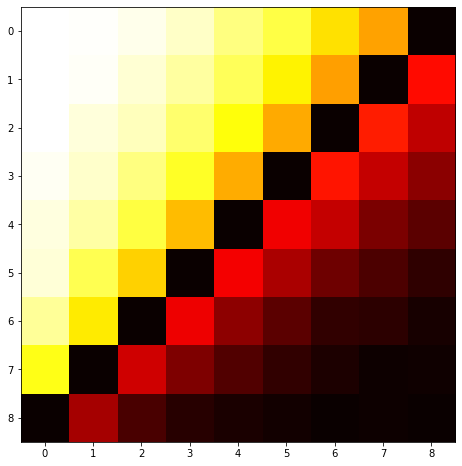

In [ ]:
plt.imshow(probmat, cmap = 'hot')
plt.gcf().set_size_inches(8,8)
plt.show()

## Run Simulation to Estimate Probabilities of Home Team win
* Using poisson distribution

In [ ]:
%%time
# number of iterations to perform in simulator
n = 1000
# initialize a 9 x 9 probability matrix to store results
probmat = np.array([[0.0] * 9] * 9)
# matrix representation of home and away team runs for table
homemat = np.array([[9] * 9, [8] * 9, [7] * 9, [6] * 9, [5] * 9, [4] * 9, [3] * 9, [2] * 9, [1] * 9])
awayrow = np.array([1,2,3,4,5,6,7,8,9])
awaymat = np.array([awayrow] * 9)

for index_home in range(9):
    for index_away in range(9):
        if (homemat[index_home, index_away] != awaymat[index_home, index_away]):            
            # run simulator
            probmat[index_home, index_away] = simulator(
                home_mean = float(homemat[index_home, index_away]),
                away_mean = float(awaymat[index_home, index_away]),
                niterations = n,
                nbinom=False # poisson distribution
            )
print(probmat)      

[[0.985 0.941 0.866 0.829 0.746 0.67  0.602 0.533 0.   ]
 [0.975 0.915 0.863 0.78  0.711 0.617 0.573 0.    0.451]
 [0.966 0.904 0.823 0.744 0.657 0.557 0.    0.424 0.408]
 [0.952 0.862 0.782 0.671 0.561 0.    0.438 0.375 0.31 ]
 [0.927 0.822 0.713 0.586 0.    0.424 0.356 0.275 0.268]
 [0.886 0.767 0.605 0.    0.403 0.344 0.243 0.219 0.191]
 [0.842 0.66  0.    0.394 0.298 0.249 0.19  0.154 0.128]
 [0.743 0.    0.359 0.231 0.207 0.137 0.097 0.064 0.062]
 [0.    0.289 0.128 0.1   0.074 0.046 0.032 0.026 0.026]]
CPU times: user 972 ms, sys: 323 µs, total: 973 ms
Wall time: 984 ms


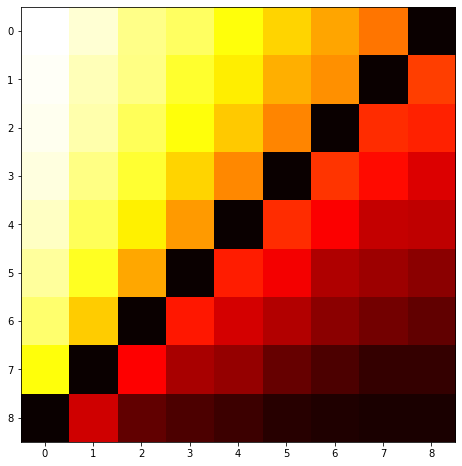

In [ ]:
plt.imshow(probmat, cmap = 'hot')
plt.gcf().set_size_inches(8,8)
plt.show()